<a href="https://colab.research.google.com/github/Andradeus/Andradeus/blob/main/An%C3%A1lise_T%C3%A9cnica_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
itub4 = pd.read_csv('itub4.csv', index_col = 0)
mglu3 = pd.read_csv('mglu3.csv', index_col = 0)
petr3 = pd.read_csv('petr3.csv', index_col = 0)
viia3 = pd.read_csv('viia3.csv', index_col = 0)

In [4]:
d = {       'itub4':itub4['Close'],
             'mglu3':mglu3['Close'], 
             'petr3':petr3['Close'],
             'viia3':viia3['Close']}

dados = pd.DataFrame(data=d)
dados.index = pd.DatetimeIndex(dados.index)

In [6]:
dados.head()

,itub4,mglu3,petr3,viia3
Date,,,,
2015-01-02,18.639118,0.232812,9.00,6.80
2015-01-05,18.732782,0.237187,8.27,6.80
2015-01-06,19.035812,0.234062,8.06,6.80
2015-01-07,19.724518,0.241875,8.45,7.36
2015-01-08,20.033056,0.240000,9.02,7.36


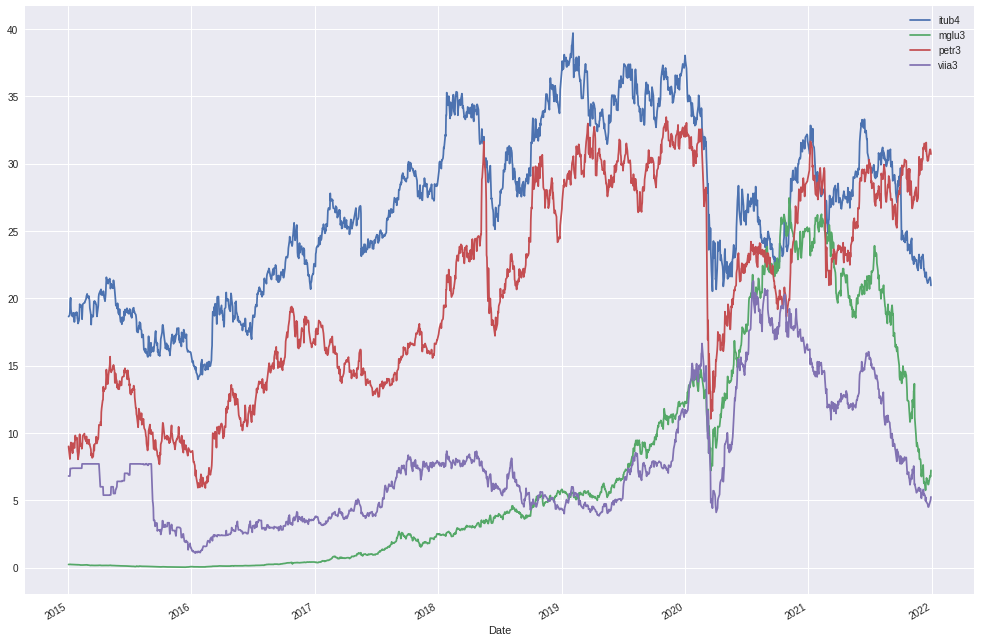

In [14]:
dados.plot(figsize = (17,12))

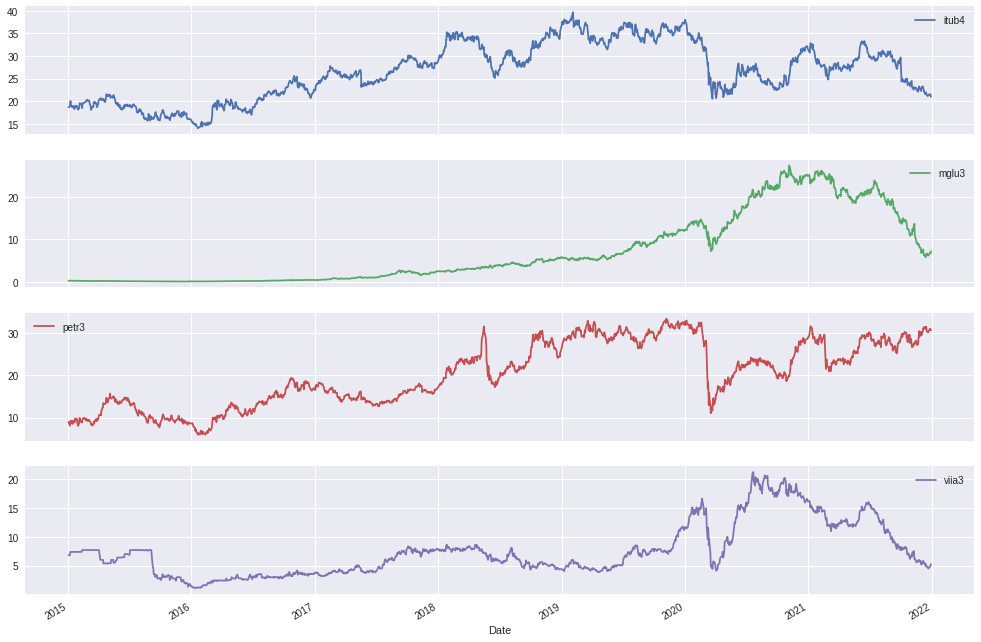

In [13]:
dados.plot(figsize = (17,12), subplots = True);

In [17]:
#MGLU3

mglu = pd.DataFrame(mglu3['Close'])

mglu.index = pd.DatetimeIndex(mglu.index)

janela = 30

In [24]:
# Mímino
mglu['min'] = mglu['Close'].rolling(window = janela).min()

# Média
mglu['media'] = mglu['Close'].rolling(window = janela).mean()

# Desvio Padrão
mglu['dp'] = mglu['Close'].rolling(window = janela).std()

# Mediana
mglu['mediana'] = mglu['Close'].rolling(window = janela).median()

# Máximo
mglu['maximo'] = mglu['Close'].rolling(window = janela).max()

In [22]:
mglu

,Close,min,media,dp,mediana,maximo
Date,,,,,,
2015-01-02,0.232812,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.237187,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.234062,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.241875,NaN,NaN,NaN,NaN,NaN
2015-01-08,0.240000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-23,6.200000,5.74,7.737667,1.753548,7.175,13.65
2021-12-27,6.780000,5.74,7.508667,1.359020,6.965,11.15
2021-12-28,6.830000,5.74,7.364667,1.176499,6.855,9.74


In [27]:
# Média Móvel de Curto Prazo
# 30 dias
mglu['MMScp'] =  mglu['Close'].rolling(window = 30).mean()

# Média Móvel de Longo Prazo
# 252 dias 
mglu['MMSlp'] = mglu['Close'].rolling(window = 252).mean()

In [28]:
mglu.dropna(inplace = True)

In [29]:
mglu

,Close,min,media,dp,mediana,maximo,MMScp,MMSlp
Date,,,,,,,,
2016-01-11,0.056328,0.030585,0.044360,0.014112,0.039687,0.07082,0.044360,0.115646
2016-01-12,0.053125,0.030585,0.044800,0.014175,0.040234,0.07082,0.044800,0.114933
2016-01-13,0.052773,0.030585,0.045183,0.014232,0.040234,0.07082,0.045183,0.114201
2016-01-14,0.055429,0.030585,0.045729,0.014302,0.041210,0.07082,0.045729,0.113492
2016-01-15,0.056250,0.030585,0.046454,0.014265,0.041953,0.07082,0.046454,0.112756
...,...,...,...,...,...,...,...,...
2021-12-23,6.200000,5.740000,7.737667,1.753548,7.175000,13.65000,7.737667,18.963413
2021-12-27,6.780000,5.740000,7.508667,1.359020,6.965000,11.15000,7.508667,18.891270
2021-12-28,6.830000,5.740000,7.364667,1.176499,6.855000,9.74000,7.364667,18.820992


In [31]:
# Avaliação de Posição
mglu['Posição'] = np.where(mglu['MMScp'] > mglu['MMSlp'], 1, -1)

In [35]:
mglu

,Close,min,media,dp,mediana,maximo,MMScp,MMSlp,Posição
Date,,,,,,,,,
2016-01-11,0.056328,0.030585,0.044360,0.014112,0.039687,0.07082,0.044360,0.115646,-1
2016-01-12,0.053125,0.030585,0.044800,0.014175,0.040234,0.07082,0.044800,0.114933,-1
2016-01-13,0.052773,0.030585,0.045183,0.014232,0.040234,0.07082,0.045183,0.114201,-1
2016-01-14,0.055429,0.030585,0.045729,0.014302,0.041210,0.07082,0.045729,0.113492,-1
2016-01-15,0.056250,0.030585,0.046454,0.014265,0.041953,0.07082,0.046454,0.112756,-1
...,...,...,...,...,...,...,...,...,...
2021-12-23,6.200000,5.740000,7.737667,1.753548,7.175000,13.65000,7.737667,18.963413,-1
2021-12-27,6.780000,5.740000,7.508667,1.359020,6.965000,11.15000,7.508667,18.891270,-1
2021-12-28,6.830000,5.740000,7.364667,1.176499,6.855000,9.74000,7.364667,18.820992,-1


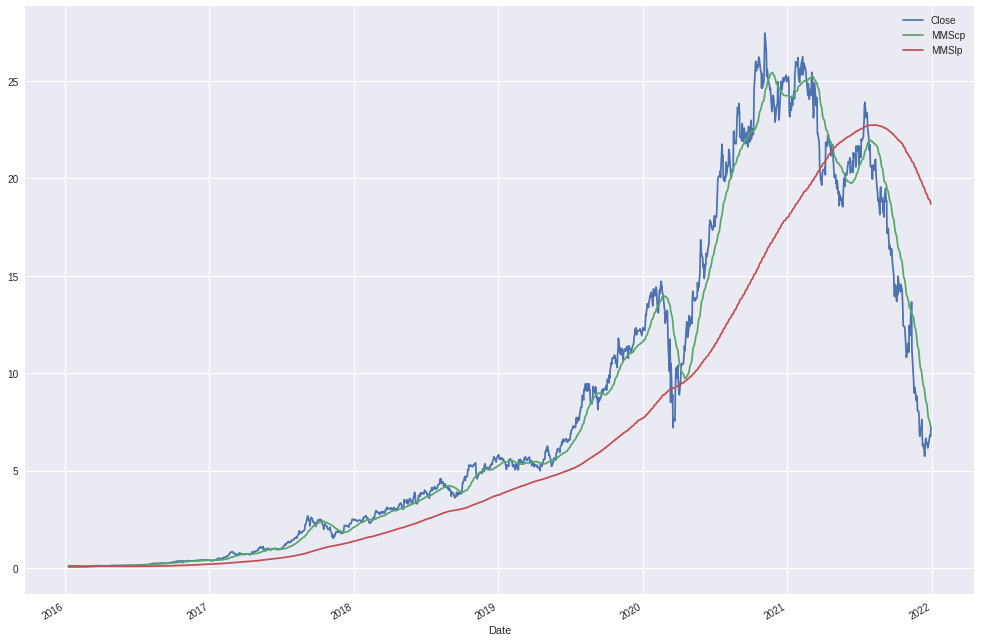

In [34]:
mglu[['Close', 'MMScp', 'MMSlp']].plot(figsize=(17,12));

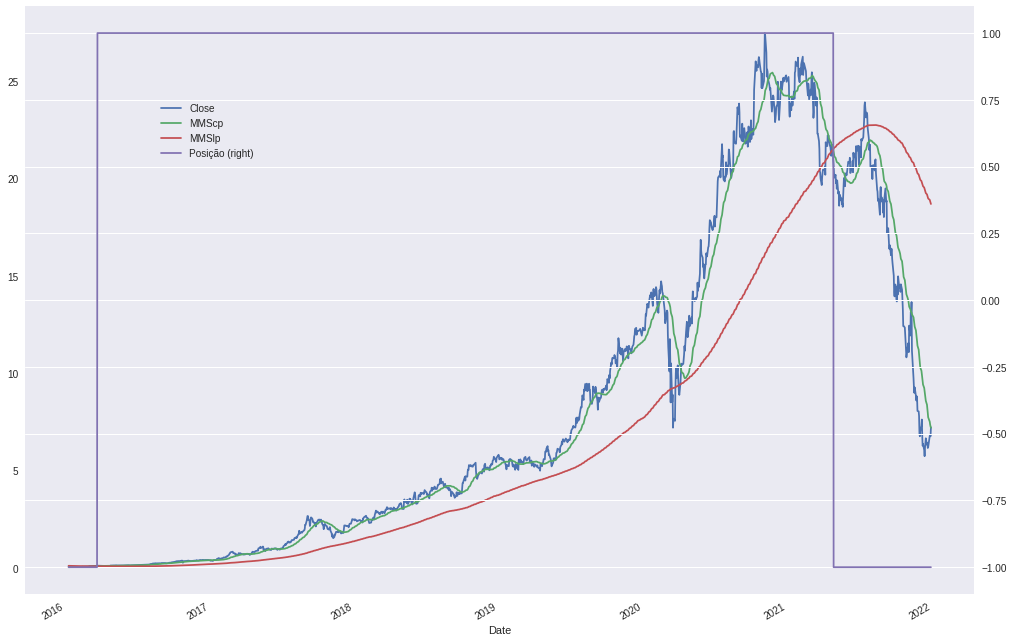

In [37]:
ax = mglu[['Close', 'MMScp', 'MMSlp', 'Posição']].plot(figsize = (17,12),
                                                           secondary_y='Posição');
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))